In [6]:
from scipy.io import loadmat
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()
import matplotlib.pyplot as plt

In [7]:
data3=loadmat('/Users/admin/Downloads/Indian_pines_corrected.mat')

In [8]:
# data3

In [9]:
data3=data3['indian_pines_corrected']
np.shape(data3)



(145, 145, 200)

In [11]:
# np.shape(data3)

temp=data3.copy().astype(float)
for i in range(np.shape(temp)[2]):
    mean=np.mean(temp[:,:,i])
    std=np.std(temp[:,:,i])
    temp[:,:,i]=(temp[:,:,i]-mean)/std
data=temp



In [12]:
# #make a function to feature normalize the data
# data=data3.copy().astype(float)
# for j in range(data.shape[2]):
#     maxv=np.max(data[:,:,j])
#     minv=np.min(data[:,:,j])
#     data[:,:,j]=(data[:,:,j]-minv)/(maxv-minv)

In [13]:
data

array([[[ 0.6047628 ,  0.21997468,  0.8862633 , ...,  1.28472014,
          0.38894136,  1.62910551],
        [-1.06326446,  0.75820528,  0.87074869, ...,  1.62021647,
          1.17937664,  1.62910551],
        [ 2.05583381,  0.75820528,  0.55657785, ...,  1.47643233,
          1.26720278,  1.06179023],
        ...,
        [-1.09144059, -0.87384878,  0.16483396, ...,  0.56579943,
          0.4767675 ,  0.91996142],
        [ 0.59912758,  0.16788785,  0.16483396, ...,  1.140936  ,
          0.74024593,  1.62910551],
        [ 0.6047628 , -0.87384878,  0.14931935, ...,  0.61372748,
          1.61850735,  1.06179023]],

       [[-1.07453491,  1.28775473,  0.2191351 , ...,  0.80543967,
          1.26720278, -0.35649795],
        [-0.59272298,  0.74952414,  1.2198274 , ...,  1.18886404,
          2.05763806,  0.91996142],
        [-0.58427014,  0.76688641,  0.56433515, ...,  0.80543967,
          0.91589821,  0.91996142],
        ...,
        [ 2.54046335,  1.82598532,  1.27024988, ...,  

In [14]:
tars=loadmat('/Users/admin/Downloads/Indian_pines_gt.mat')
tars=tars['indian_pines_gt']



In [15]:
tars.flatten()

array([3, 3, 3, ..., 0, 0, 0], dtype=uint8)

In [16]:
tars.flatten().shape,data.shape

((21025,), (145, 145, 200))

In [17]:
flat_y=tars.flatten()
indexes=np.where(flat_y==0)
flat_y=np.delete(flat_y,indexes[0],axis=0)
flat_y.shape,len(indexes[0])

((10249,), 10776)

In [18]:
#split data

flat_x=data.reshape(-1,200)
flat_y=tars.flatten() ; print(flat_x.shape,flat_y.shape) # flatten datapoints 


indexes=np.where(flat_y==0) # remove 0's

flat_y=np.delete(flat_y,indexes[0],axis=0)
flat_x=np.delete(flat_x,indexes[0],axis=0)
print('Removed',len(indexes[0]))
print(flat_x.shape,flat_y.shape)


for e in np.linspace(1,16,16):
    e=int(e)
    indexes=np.where(flat_y==e)
    length=len(indexes[0])/2
    
    print('For ',e,len(indexes[0]))
    
    keep=indexes[0][:length]
    remove=indexes[0][length:]

    
    try:test_x=np.concatenate((test_x,flat_x[remove]))
    except:test_x=flat_x[remove]
    try:test_y=np.concatenate((test_y,flat_y[remove]))
    except:test_y=flat_y[remove]
            
#     print(flat_x.shape,'s',flat_y.shape)
    
    flat_y=np.delete(flat_y,remove,axis=0)
    flat_x=np.delete(flat_x,remove,axis=0)
    
#     print(flat_x.shape,'s',flat_y.shape)

    

((21025, 200), (21025,))
('Removed', 10776)
((10249, 200), (10249,))
('For ', 1, 46)
('For ', 2, 1428)
('For ', 3, 830)
('For ', 4, 237)
('For ', 5, 483)
('For ', 6, 730)
('For ', 7, 28)
('For ', 8, 478)
('For ', 9, 20)
('For ', 10, 972)
('For ', 11, 2455)
('For ', 12, 593)
('For ', 13, 205)
('For ', 14, 1265)
('For ', 15, 386)
('For ', 16, 93)


In [19]:
flat_y

array([ 3,  3,  3, ..., 14, 14, 14], dtype=uint8)

In [20]:
print(flat_x.shape,'tr',flat_y.shape)
print(test_x.shape,'te',test_y.shape)



((5121, 200), 'tr', (5121,))
((5128, 200), 'te', (5128,))


In [21]:
np.zeros((1,17)).shape

(1, 17)

In [22]:
#shuffle
def shuffle(x,y):
    perm = np.random.permutation(x.shape[0])
    return(x[perm,:],y[perm])

flat_x,flat_y=shuffle(flat_x,flat_y)
test_x,test_y=shuffle(test_x,test_y)

In [23]:
flat_y

array([ 6, 10,  8, ...,  4, 11,  3], dtype=uint8)

In [24]:
def one_hot(x):
    for e in x:
        if e==0: continue 
        v=np.zeros((1,16))
        v[:,int(e-1)]=1   # 1 is mapped to 0 and so on
        try:temp=np.concatenate((temp,v)) 
        except: temp=v
    return(temp)

In [25]:
one_train=one_hot(flat_y)
one_test=one_hot(test_y)
print(one_train.shape,one_test.shape)

((5121, 16), (5128, 16))


In [26]:
# Datas:
# flat_x
# one_train

# test_x
# one_test

In [29]:
lr=0.1

In [40]:
def trainer(runs,L=None,train_x=flat_x,train_y=one_train,y_notone=flat_y,w=None,reg=0.001): 
    try: 
        if not w: 
            w = np.random.normal(0, 1, (np.shape(data)[-1], 16)) # create w
    except: print("W declared")
    if not L: L=[]
    for p in range(runs):
        out=np.matmul(train_x , w)
        exp=np.exp(out)

        for i in range(exp.shape[0]): #softmax
            sums= np.sum(exp[i,:])
            exp[i,:]=exp[i,:]/sums 

        logs=np.log(exp)
    
        argmax=np.argmax(exp,1)
        acc=(argmax+1)==y_notone

        dot=train_y*logs
        loss=-np.sum(dot)* 1/train_x.shape[0] + reg*0.5*np.sum(w*w)
        print('Runs: ',p,'Loss: ',loss,'Acc',(np.sum(acc)+0.1)/train_x.shape[0])
        
        L.append(loss)
        grad= - np.dot(train_x.T,train_y-exp) * 1/train_x.shape[0] + reg*w
        w= w  - lr*grad 
        
    return(w,L)


def tester(x,y,test_y,w):
    #test_y is NOT one_hot encoded y
    out=np.matmul(x , w)
    exp=np.exp(out)
    for i in range(exp.shape[0]): #softmax
        sums= np.sum(exp[i,:])
        exp[i,:]=exp[i,:]/sums 
        
    logs=np.log(exp)
    dot=y*logs
    loss=-np.sum(dot)* 1/x.shape[0]
    
    print('Test Loss: ',loss)

    print(y.shape,dot.shape)
    argmax=np.argmax(exp,1)
    print(argmax, np.unique(argmax))
    print(test_y)
    acc=(argmax+1)==test_y
    print((np.sum(acc)+0.1)/x.shape[0])
    return(loss)
    
    

('Runs: ', 0, 'Loss: ', 28.1686128494692, 'Acc', 0.04083186877562976)
('Runs: ', 1, 'Loss: ', 22.604220914665834, 'Acc', 0.052157781683264993)
('Runs: ', 2, 'Loss: ', 18.18087409478965, 'Acc', 0.07676235110330014)
('Runs: ', 3, 'Loss: ', 14.885303075842462, 'Acc', 0.11015426674477642)
('Runs: ', 4, 'Loss: ', 12.584304659112512, 'Acc', 0.19548916227299357)
('Runs: ', 5, 'Loss: ', 11.617489056688125, 'Acc', 0.259734426869752)
('Runs: ', 6, 'Loss: ', 10.9721757941308, 'Acc', 0.2648115602421402)
('Runs: ', 7, 'Loss: ', 10.405971476685764, 'Acc', 0.2683264987307166)
('Runs: ', 8, 'Loss: ', 9.898002149617387, 'Acc', 0.27281780902167546)
('Runs: ', 9, 'Loss: ', 9.440173297714487, 'Acc', 0.282190978324546)
('Runs: ', 10, 'Loss: ', 9.03383531955016, 'Acc', 0.2876586604178871)
('Runs: ', 11, 'Loss: ', 8.67530606873324, 'Acc', 0.29234524506932236)
('Runs: ', 12, 'Loss: ', 8.354370310884162, 'Acc', 0.29586018355789884)
('Runs: ', 13, 'Loss: ', 8.05983304064081, 'Acc', 0.3003514938488576)
('Runs: '

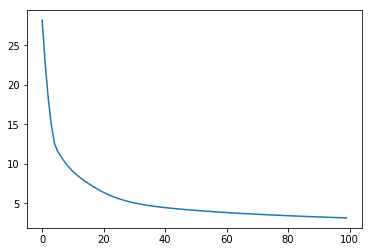

In [31]:
new,L=trainer(100);plt.plot(L);plt.show()


W declared
('Runs: ', 0, 'Loss: ', 1.700432773355625, 'Acc', 0.8154852567857841)
('Runs: ', 1, 'Loss: ', 1.700168168705673, 'Acc', 0.8154852567857841)
('Runs: ', 2, 'Loss: ', 1.699903630941356, 'Acc', 0.8154852567857841)
('Runs: ', 3, 'Loss: ', 1.6996391600429257, 'Acc', 0.8154852567857841)
('Runs: ', 4, 'Loss: ', 1.699374755990641, 'Acc', 0.8154852567857841)
('Runs: ', 5, 'Loss: ', 1.6991104187647679, 'Acc', 0.8154852567857841)
('Runs: ', 6, 'Loss: ', 1.6988461483455777, 'Acc', 0.8154852567857841)
('Runs: ', 7, 'Loss: ', 1.6985819447133492, 'Acc', 0.8154852567857841)
('Runs: ', 8, 'Loss: ', 1.6983178078483658, 'Acc', 0.8154852567857841)
('Runs: ', 9, 'Loss: ', 1.6980537377309188, 'Acc', 0.8156805311462606)
('Runs: ', 10, 'Loss: ', 1.697789734341305, 'Acc', 0.8156805311462606)
('Runs: ', 11, 'Loss: ', 1.6975257976598277, 'Acc', 0.8156805311462606)
('Runs: ', 12, 'Loss: ', 1.697261927666796, 'Acc', 0.8156805311462606)
('Runs: ', 13, 'Loss: ', 1.6969981243425272, 'Acc', 0.815680531146260

('Runs: ', 116, 'Loss: ', 1.6701798008078326, 'Acc', 0.8176332747510252)
('Runs: ', 117, 'Loss: ', 1.6699228247594124, 'Acc', 0.8176332747510252)
('Runs: ', 118, 'Loss: ', 1.6696659133474192, 'Acc', 0.8176332747510252)
('Runs: ', 119, 'Loss: ', 1.6694090665528227, 'Acc', 0.8176332747510252)
('Runs: ', 120, 'Loss: ', 1.669152284356598, 'Acc', 0.8176332747510252)
('Runs: ', 121, 'Loss: ', 1.668895566739725, 'Acc', 0.8176332747510252)
('Runs: ', 122, 'Loss: ', 1.6686389136831918, 'Acc', 0.8176332747510252)
('Runs: ', 123, 'Loss: ', 1.6683823251679908, 'Acc', 0.8176332747510252)
('Runs: ', 124, 'Loss: ', 1.668125801175122, 'Acc', 0.8178285491115017)
('Runs: ', 125, 'Loss: ', 1.6678693416855896, 'Acc', 0.8178285491115017)
('Runs: ', 126, 'Loss: ', 1.6676129466804062, 'Acc', 0.8178285491115017)
('Runs: ', 127, 'Loss: ', 1.6673566161405877, 'Acc', 0.8180238234719782)
('Runs: ', 128, 'Loss: ', 1.6671003500471588, 'Acc', 0.8182190978324547)
('Runs: ', 129, 'Loss: ', 1.6668441483811478, 'Acc', 0

('Runs: ', 234, 'Loss: ', 1.6402977789234163, 'Acc', 0.8211482132396017)
('Runs: ', 235, 'Loss: ', 1.6400483002096669, 'Acc', 0.8211482132396017)
('Runs: ', 236, 'Loss: ', 1.6397988839281918, 'Acc', 0.8213434876000781)
('Runs: ', 237, 'Loss: ', 1.6395495300606693, 'Acc', 0.8213434876000781)
('Runs: ', 238, 'Loss: ', 1.6393002385887798, 'Acc', 0.8213434876000781)
('Runs: ', 239, 'Loss: ', 1.639051009494213, 'Acc', 0.8215387619605546)
('Runs: ', 240, 'Loss: ', 1.6388018427586637, 'Acc', 0.8215387619605546)
('Runs: ', 241, 'Loss: ', 1.6385527383638316, 'Acc', 0.8215387619605546)
('Runs: ', 242, 'Loss: ', 1.6383036962914228, 'Acc', 0.8215387619605546)
('Runs: ', 243, 'Loss: ', 1.6380547165231505, 'Acc', 0.8215387619605546)
('Runs: ', 244, 'Loss: ', 1.637805799040732, 'Acc', 0.8215387619605546)
('Runs: ', 245, 'Loss: ', 1.6375569438258923, 'Acc', 0.8215387619605546)
('Runs: ', 246, 'Loss: ', 1.6373081508603613, 'Acc', 0.8215387619605546)
('Runs: ', 247, 'Loss: ', 1.6370594201258748, 'Acc', 

('Runs: ', 353, 'Loss: ', 1.6110431789173894, 'Acc', 0.8232962312048429)
('Runs: ', 354, 'Loss: ', 1.6108010026238082, 'Acc', 0.8232962312048429)
('Runs: ', 355, 'Loss: ', 1.6105588866237484, 'Acc', 0.8232962312048429)
('Runs: ', 356, 'Loss: ', 1.6103168308995932, 'Acc', 0.8232962312048429)
('Runs: ', 357, 'Loss: ', 1.6100748354337329, 'Acc', 0.8232962312048429)
('Runs: ', 358, 'Loss: ', 1.6098329002085614, 'Acc', 0.8232962312048429)
('Runs: ', 359, 'Loss: ', 1.609591025206482, 'Acc', 0.8232962312048429)
('Runs: ', 360, 'Loss: ', 1.6093492104099, 'Acc', 0.8232962312048429)
('Runs: ', 361, 'Loss: ', 1.6091074558012297, 'Acc', 0.8232962312048429)
('Runs: ', 362, 'Loss: ', 1.6088657613628898, 'Acc', 0.8232962312048429)
('Runs: ', 363, 'Loss: ', 1.6086241270773056, 'Acc', 0.8232962312048429)
('Runs: ', 364, 'Loss: ', 1.6083825529269076, 'Acc', 0.8232962312048429)
('Runs: ', 365, 'Loss: ', 1.608141038894133, 'Acc', 0.8232962312048429)
('Runs: ', 366, 'Loss: ', 1.6078995849614253, 'Acc', 0.8

('Runs: ', 470, 'Loss: ', 1.58311316579276, 'Acc', 0.8246631517281782)
('Runs: ', 471, 'Loss: ', 1.5828779258382302, 'Acc', 0.8246631517281782)
('Runs: ', 472, 'Loss: ', 1.5826427441563262, 'Acc', 0.8246631517281782)
('Runs: ', 473, 'Loss: ', 1.582407620730127, 'Acc', 0.8246631517281782)
('Runs: ', 474, 'Loss: ', 1.5821725555427137, 'Acc', 0.8246631517281782)
('Runs: ', 475, 'Loss: ', 1.581937548577177, 'Acc', 0.8248584260886547)
('Runs: ', 476, 'Loss: ', 1.5817025998166105, 'Acc', 0.8248584260886547)
('Runs: ', 477, 'Loss: ', 1.581467709244115, 'Acc', 0.8248584260886547)
('Runs: ', 478, 'Loss: ', 1.5812328768427975, 'Acc', 0.8248584260886547)
('Runs: ', 479, 'Loss: ', 1.5809981025957704, 'Acc', 0.8248584260886547)
('Runs: ', 480, 'Loss: ', 1.5807633864861517, 'Acc', 0.8248584260886547)
('Runs: ', 481, 'Loss: ', 1.5805287284970666, 'Acc', 0.8248584260886547)
('Runs: ', 482, 'Loss: ', 1.5802941286116443, 'Acc', 0.8248584260886547)
('Runs: ', 483, 'Loss: ', 1.580059586813022, 'Acc', 0.82

('Runs: ', 583, 'Loss: ', 1.5568958763104168, 'Acc', 0.8272017184143723)
('Runs: ', 584, 'Loss: ', 1.5566671154893656, 'Acc', 0.8273969927748487)
('Runs: ', 585, 'Loss: ', 1.5564384110684277, 'Acc', 0.8273969927748487)
('Runs: ', 586, 'Loss: ', 1.5562097630314706, 'Acc', 0.8273969927748487)
('Runs: ', 587, 'Loss: ', 1.5559811713624927, 'Acc', 0.8273969927748487)
('Runs: ', 588, 'Loss: ', 1.5557526360453977, 'Acc', 0.8273969927748487)
('Runs: ', 589, 'Loss: ', 1.5555241570642317, 'Acc', 0.8273969927748487)
('Runs: ', 590, 'Loss: ', 1.5552957344029368, 'Acc', 0.8273969927748487)
('Runs: ', 591, 'Loss: ', 1.5550673680456115, 'Acc', 0.8273969927748487)
('Runs: ', 592, 'Loss: ', 1.5548390579762414, 'Acc', 0.8273969927748487)
('Runs: ', 593, 'Loss: ', 1.5546108041789846, 'Acc', 0.8273969927748487)
('Runs: ', 594, 'Loss: ', 1.5543826066378745, 'Acc', 0.8273969927748487)
('Runs: ', 595, 'Loss: ', 1.5541544653371364, 'Acc', 0.8273969927748487)
('Runs: ', 596, 'Loss: ', 1.5539263802608576, 'Acc'

('Runs: ', 697, 'Loss: ', 1.531178516385237, 'Acc', 0.8289591876586605)
('Runs: ', 698, 'Loss: ', 1.530956240678615, 'Acc', 0.8281780902167546)
('Runs: ', 699, 'Loss: ', 1.530734033544057, 'Acc', 0.8289591876586605)
('Runs: ', 700, 'Loss: ', 1.5305118937911428, 'Acc', 0.8281780902167546)
('Runs: ', 701, 'Loss: ', 1.5302898250597732, 'Acc', 0.8289591876586605)
('Runs: ', 702, 'Loss: ', 1.530067825759703, 'Acc', 0.8281780902167546)
('Runs: ', 703, 'Loss: ', 1.529845900383004, 'Acc', 0.828763913298184)
('Runs: ', 704, 'Loss: ', 1.5296240468182114, 'Acc', 0.8283733645772311)
('Runs: ', 705, 'Loss: ', 1.52940227061623, 'Acc', 0.8285686389377076)
('Runs: ', 706, 'Loss: ', 1.529180568987948, 'Acc', 0.8285686389377076)
('Runs: ', 707, 'Loss: ', 1.528958948801506, 'Acc', 0.8285686389377076)
('Runs: ', 708, 'Loss: ', 1.5287374063888213, 'Acc', 0.8285686389377076)
('Runs: ', 709, 'Loss: ', 1.5285159502587042, 'Acc', 0.828763913298184)
('Runs: ', 710, 'Loss: ', 1.5282945756052664, 'Acc', 0.8285686

('Runs: ', 812, 'Loss: ', 1.5179235947720424, 'Acc', 0.8184143721929311)
('Runs: ', 813, 'Loss: ', 1.5185330940162904, 'Acc', 0.828763913298184)
('Runs: ', 814, 'Loss: ', 1.518642591126479, 'Acc', 0.8174380003905488)
('Runs: ', 815, 'Loss: ', 1.5192944723975215, 'Acc', 0.8285686389377076)
('Runs: ', 816, 'Loss: ', 1.5193663484344193, 'Acc', 0.8160710798672135)
('Runs: ', 817, 'Loss: ', 1.5200527823791143, 'Acc', 0.8283733645772311)
('Runs: ', 818, 'Loss: ', 1.5200751988496606, 'Acc', 0.8147041593438782)
('Runs: ', 819, 'Loss: ', 1.5207874401285522, 'Acc', 0.8272017184143723)
('Runs: ', 820, 'Loss: ', 1.5207494594906794, 'Acc', 0.8141183362624488)
('Runs: ', 821, 'Loss: ', 1.5214783338970088, 'Acc', 0.825834797891037)
('Runs: ', 822, 'Loss: ', 1.5213706089314036, 'Acc', 0.81294669009959)
('Runs: ', 823, 'Loss: ', 1.5221070268878039, 'Acc', 0.8252489748096076)
('Runs: ', 824, 'Loss: ', 1.5219223647163584, 'Acc', 0.8125561413786371)
('Runs: ', 825, 'Loss: ', 1.5226578001144593, 'Acc', 0.8

('Runs: ', 926, 'Loss: ', 1.5003862210210297, 'Acc', 0.8135325131810194)
('Runs: ', 927, 'Loss: ', 1.5006337607147193, 'Acc', 0.8256395235305605)
('Runs: ', 928, 'Loss: ', 1.4998964111639208, 'Acc', 0.8131419644600665)
('Runs: ', 929, 'Loss: ', 1.5001422294181945, 'Acc', 0.8256395235305605)
('Runs: ', 930, 'Loss: ', 1.4994087147707273, 'Acc', 0.813337238820543)
('Runs: ', 931, 'Loss: ', 1.4996528441294086, 'Acc', 0.825834797891037)
('Runs: ', 932, 'Loss: ', 1.4989230314550799, 'Acc', 0.8135325131810194)
('Runs: ', 933, 'Loss: ', 1.499165503214097, 'Acc', 0.8260300722515135)
('Runs: ', 934, 'Loss: ', 1.4984392673019664, 'Acc', 0.8135325131810194)
('Runs: ', 935, 'Loss: ', 1.4986801116813677, 'Acc', 0.8264206209724664)
('Runs: ', 936, 'Loss: ', 1.497957334598821, 'Acc', 0.813337238820543)
('Runs: ', 937, 'Loss: ', 1.4981965808882012, 'Acc', 0.8264206209724664)
('Runs: ', 938, 'Loss: ', 1.4974771515461387, 'Acc', 0.8137277875414959)
('Runs: ', 939, 'Loss: ', 1.4977148282270583, 'Acc', 0.8

('Runs: ', 1039, 'Loss: ', 1.4750280216952802, 'Acc', 0.828763913298184)
('Runs: ', 1040, 'Loss: ', 1.4744075142458402, 'Acc', 0.8150947080648312)
('Runs: ', 1041, 'Loss: ', 1.4745940653516105, 'Acc', 0.828763913298184)
('Runs: ', 1042, 'Loss: ', 1.4739747296030496, 'Acc', 0.8150947080648312)
('Runs: ', 1043, 'Loss: ', 1.4741607118727176, 'Acc', 0.8289591876586605)
('Runs: ', 1044, 'Loss: ', 1.473542529153757, 'Acc', 0.8148994337043547)
('Runs: ', 1045, 'Loss: ', 1.4737279547585238, 'Acc', 0.8289591876586605)
('Runs: ', 1046, 'Loss: ', 1.4731109067279093, 'Acc', 0.8150947080648312)
('Runs: ', 1047, 'Loss: ', 1.4732957876320563, 'Acc', 0.829154462019137)
('Runs: ', 1048, 'Loss: ', 1.4726798562709282, 'Acc', 0.8150947080648312)
('Runs: ', 1049, 'Loss: ', 1.4728642042358957, 'Acc', 0.829154462019137)
('Runs: ', 1050, 'Loss: ', 1.472249371840466, 'Acc', 0.8150947080648312)
('Runs: ', 1051, 'Loss: ', 1.472433198428884, 'Acc', 0.829154462019137)
('Runs: ', 1052, 'Loss: ', 1.4718194476034014,

('Runs: ', 1153, 'Loss: ', 1.4511031090287114, 'Acc', 0.8311072056239016)
('Runs: ', 1154, 'Loss: ', 1.450527011161829, 'Acc', 0.8176332747510252)
('Runs: ', 1155, 'Loss: ', 1.4506958518530628, 'Acc', 0.8309119312634252)
('Runs: ', 1156, 'Loss: ', 1.450120232901063, 'Acc', 0.8176332747510252)
('Runs: ', 1157, 'Loss: ', 1.4502889623305435, 'Acc', 0.8309119312634252)
('Runs: ', 1158, 'Loss: ', 1.4497138147905655, 'Acc', 0.8176332747510252)
('Runs: ', 1159, 'Loss: ', 1.4498824380038768, 'Acc', 0.8307166569029487)
('Runs: ', 1160, 'Loss: ', 1.4493077544799795, 'Acc', 0.8176332747510252)
('Runs: ', 1161, 'Loss: ', 1.4494762764529248, 'Acc', 0.8307166569029487)
('Runs: ', 1162, 'Loss: ', 1.4489020496542082, 'Acc', 0.8176332747510252)
('Runs: ', 1163, 'Loss: ', 1.449070475293964, 'Acc', 0.8307166569029487)
('Runs: ', 1164, 'Loss: ', 1.448496698032732, 'Acc', 0.8176332747510252)
('Runs: ', 1165, 'Loss: ', 1.4486650321789813, 'Acc', 0.8307166569029487)
('Runs: ', 1166, 'Loss: ', 1.4480916973689

('Runs: ', 1269, 'Loss: ', 1.428027117788551, 'Acc', 0.831693028705331)
('Runs: ', 1270, 'Loss: ', 1.4274690495107447, 'Acc', 0.8184143721929311)
('Runs: ', 1271, 'Loss: ', 1.4276380246574685, 'Acc', 0.831693028705331)
('Runs: ', 1272, 'Loss: ', 1.4270801324483373, 'Acc', 0.8184143721929311)
('Runs: ', 1273, 'Loss: ', 1.4272492013144746, 'Acc', 0.831693028705331)
('Runs: ', 1274, 'Loss: ', 1.426691481692424, 'Acc', 0.8184143721929311)
('Runs: ', 1275, 'Loss: ', 1.426860646641544, 'Acc', 0.831693028705331)
('Runs: ', 1276, 'Loss: ', 1.4263030961676422, 'Acc', 0.8184143721929311)
('Runs: ', 1277, 'Loss: ', 1.4264723595341564, 'Acc', 0.831693028705331)
('Runs: ', 1278, 'Loss: ', 1.4259149748115325, 'Acc', 0.8184143721929311)
('Runs: ', 1279, 'Loss: ', 1.4260843389010933, 'Acc', 0.831693028705331)
('Runs: ', 1280, 'Loss: ', 1.425527116574345, 'Acc', 0.8184143721929311)
('Runs: ', 1281, 'Loss: ', 1.4256965836642337, 'Acc', 0.831693028705331)
('Runs: ', 1282, 'Loss: ', 1.4251395204188428, 'A

('Runs: ', 1381, 'Loss: ', 1.4066266615261696, 'Acc', 0.8326694005077134)
('Runs: ', 1382, 'Loss: ', 1.406074085763532, 'Acc', 0.8193907439953135)
('Runs: ', 1383, 'Loss: ', 1.4062512653995114, 'Acc', 0.8326694005077134)
('Runs: ', 1384, 'Loss: ', 1.4056987228102729, 'Acc', 0.8193907439953135)
('Runs: ', 1385, 'Loss: ', 1.4058760926505722, 'Acc', 0.8326694005077134)
('Runs: ', 1386, 'Loss: ', 1.4053235814356781, 'Acc', 0.8193907439953135)
('Runs: ', 1387, 'Loss: ', 1.405501142680305, 'Acc', 0.8326694005077134)
('Runs: ', 1388, 'Loss: ', 1.404948661060982, 'Acc', 0.8193907439953135)
('Runs: ', 1389, 'Loss: ', 1.4051264148957237, 'Acc', 0.8326694005077134)
('Runs: ', 1390, 'Loss: ', 1.4045739611132264, 'Acc', 0.8193907439953135)
('Runs: ', 1391, 'Loss: ', 1.4047519087098217, 'Acc', 0.8326694005077134)
('Runs: ', 1392, 'Loss: ', 1.4041994810251897, 'Acc', 0.819195469634837)
('Runs: ', 1393, 'Loss: ', 1.4043776235414964, 'Acc', 0.8326694005077134)
('Runs: ', 1394, 'Loss: ', 1.4038252202353

('Runs: ', 1496, 'Loss: ', 1.385017114044825, 'Acc', 0.8201718414372193)
('Runs: ', 1497, 'Loss: ', 1.3852066931260612, 'Acc', 0.8340363210310487)
('Runs: ', 1498, 'Loss: ', 1.3846536013399935, 'Acc', 0.8201718414372193)
('Runs: ', 1499, 'Loss: ', 1.3848434205229836, 'Acc', 0.8342315953915251)
('Runs: ', 1500, 'Loss: ', 1.3842902846430538, 'Acc', 0.8201718414372193)
('Runs: ', 1501, 'Loss: ', 1.3844803445327725, 'Acc', 0.8342315953915251)
('Runs: ', 1502, 'Loss: ', 1.3839271636116077, 'Acc', 0.8201718414372193)
('Runs: ', 1503, 'Loss: ', 1.3841174648056436, 'Acc', 0.8342315953915251)
('Runs: ', 1504, 'Loss: ', 1.3835642379060917, 'Acc', 0.8201718414372193)
('Runs: ', 1505, 'Loss: ', 1.38375478099473, 'Acc', 0.8342315953915251)
('Runs: ', 1506, 'Loss: ', 1.3832015071897454, 'Acc', 0.8201718414372193)
('Runs: ', 1507, 'Loss: ', 1.3833922927560458, 'Acc', 0.8342315953915251)
('Runs: ', 1508, 'Loss: ', 1.3828389711285756, 'Acc', 0.8199765670767429)
('Runs: ', 1509, 'Loss: ', 1.383029999748

('Runs: ', 1609, 'Loss: ', 1.3651574674517217, 'Acc', 0.8352079671939076)
('Runs: ', 1610, 'Loss: ', 1.3646006936719561, 'Acc', 0.8205623901581723)
('Runs: ', 1611, 'Loss: ', 1.3648047361805156, 'Acc', 0.835403241554384)
('Runs: ', 1612, 'Loss: ', 1.3642478782840006, 'Acc', 0.8207576645186487)
('Runs: ', 1613, 'Loss: ', 1.3644521856118734, 'Acc', 0.835403241554384)
('Runs: ', 1614, 'Loss: ', 1.3638952430809785, 'Acc', 0.8207576645186487)
('Runs: ', 1615, 'Loss: ', 1.364099815516659, 'Acc', 0.835403241554384)
('Runs: ', 1616, 'Loss: ', 1.363542787839322, 'Acc', 0.8209529388791252)
('Runs: ', 1617, 'Loss: ', 1.3637476256672707, 'Acc', 0.8355985159148605)
('Runs: ', 1618, 'Loss: ', 1.3631905123369399, 'Acc', 0.8209529388791252)
('Runs: ', 1619, 'Loss: ', 1.3633956158376237, 'Acc', 0.8355985159148605)
('Runs: ', 1620, 'Loss: ', 1.3628384163532017, 'Acc', 0.8209529388791252)
('Runs: ', 1621, 'Loss: ', 1.3630437858031361, 'Acc', 0.8355985159148605)
('Runs: ', 1622, 'Loss: ', 1.36248649966892

('Runs: ', 1722, 'Loss: ', 1.345114806141253, 'Acc', 0.8215387619605546)
('Runs: ', 1723, 'Loss: ', 1.3453340245119314, 'Acc', 0.8379418082405781)
('Runs: ', 1724, 'Loss: ', 1.3447717725114, 'Acc', 0.8215387619605546)
('Runs: ', 1725, 'Loss: ', 1.3449912666357637, 'Acc', 0.8379418082405781)
('Runs: ', 1726, 'Loss: ', 1.3444289084381147, 'Acc', 0.8215387619605546)
('Runs: ', 1727, 'Loss: ', 1.3446486784312004, 'Acc', 0.8379418082405781)
('Runs: ', 1728, 'Loss: ', 1.3440862137603737, 'Acc', 0.8217340363210311)
('Runs: ', 1729, 'Loss: ', 1.3443062597349136, 'Acc', 0.8381370826010546)
('Runs: ', 1730, 'Loss: ', 1.3437436883179723, 'Acc', 0.8217340363210311)
('Runs: ', 1731, 'Loss: ', 1.3439640103844157, 'Acc', 0.838332356961531)
('Runs: ', 1732, 'Loss: ', 1.3434013319515157, 'Acc', 0.8217340363210311)
('Runs: ', 1733, 'Loss: ', 1.3436219302180514, 'Acc', 0.8385276313220075)
('Runs: ', 1734, 'Loss: ', 1.3430591445024112, 'Acc', 0.8217340363210311)
('Runs: ', 1735, 'Loss: ', 1.34328001907499

('Runs: ', 1838, 'Loss: ', 1.3254944772166137, 'Acc', 0.82290568248389)
('Runs: ', 1839, 'Loss: ', 1.3257298168674119, 'Acc', 0.8395040031243899)
('Runs: ', 1840, 'Loss: ', 1.3251610338566764, 'Acc', 0.82290568248389)
('Runs: ', 1841, 'Loss: ', 1.3253966527261376, 'Acc', 0.8395040031243899)
('Runs: ', 1842, 'Loss: ', 1.32482775184871, 'Acc', 0.82290568248389)
('Runs: ', 1843, 'Loss: ', 1.3250636499489847, 'Acc', 0.8395040031243899)
('Runs: ', 1844, 'Loss: ', 1.3244946310680608, 'Acc', 0.82290568248389)
('Runs: ', 1845, 'Loss: ', 1.324730808409977, 'Acc', 0.8395040031243899)
('Runs: ', 1846, 'Loss: ', 1.3241616713905422, 'Acc', 0.82290568248389)
('Runs: ', 1847, 'Loss: ', 1.3243981279836174, 'Acc', 0.8395040031243899)
('Runs: ', 1848, 'Loss: ', 1.323828872692431, 'Acc', 0.82290568248389)
('Runs: ', 1849, 'Loss: ', 1.3240656085448848, 'Acc', 0.8395040031243899)
('Runs: ', 1850, 'Loss: ', 1.3234962348504622, 'Acc', 0.82290568248389)
('Runs: ', 1851, 'Loss: ', 1.323733249969229, 'Acc', 0.8

('Runs: ', 1951, 'Loss: ', 1.3073177944481122, 'Acc', 0.8398945518453428)
('Runs: ', 1952, 'Loss: ', 1.306742244302012, 'Acc', 0.8227104081234135)
('Runs: ', 1953, 'Loss: ', 1.3069934845403397, 'Acc', 0.8398945518453428)
('Runs: ', 1954, 'Loss: ', 1.3064178112160347, 'Acc', 0.8227104081234135)
('Runs: ', 1955, 'Loss: ', 1.3066693295743077, 'Acc', 0.8398945518453428)
('Runs: ', 1956, 'Loss: ', 1.3060935330136032, 'Acc', 0.82290568248389)
('Runs: ', 1957, 'Loss: ', 1.3063453294452616, 'Acc', 0.8396992774848663)
('Runs: ', 1958, 'Loss: ', 1.3057694095910346, 'Acc', 0.82290568248389)
('Runs: ', 1959, 'Loss: ', 1.3060214840487419, 'Acc', 0.8396992774848663)
('Runs: ', 1960, 'Loss: ', 1.305445440844931, 'Acc', 0.82290568248389)
('Runs: ', 1961, 'Loss: ', 1.3056977932805789, 'Acc', 0.8396992774848663)
('Runs: ', 1962, 'Loss: ', 1.3051216266721732, 'Acc', 0.82290568248389)
('Runs: ', 1963, 'Loss: ', 1.3053742570368914, 'Acc', 0.8396992774848663)
('Runs: ', 1964, 'Loss: ', 1.304797966969923, 'A

('Runs: ', 2065, 'Loss: ', 1.2890764581329026, 'Acc', 0.8404803749267722)
('Runs: ', 2066, 'Loss: ', 1.2884938218473347, 'Acc', 0.82290568248389)
('Runs: ', 2067, 'Loss: ', 1.288760820433547, 'Acc', 0.8404803749267722)
('Runs: ', 2068, 'Loss: ', 1.2881780591137222, 'Acc', 0.8231009568443665)
('Runs: ', 2069, 'Loss: ', 1.2884453321107139, 'Acc', 0.8404803749267722)
('Runs: ', 2070, 'Loss: ', 1.2878624457465162, 'Acc', 0.8231009568443665)
('Runs: ', 2071, 'Loss: ', 1.2881299930731205, 'Acc', 0.8404803749267722)
('Runs: ', 2072, 'Loss: ', 1.2875469816550802, 'Acc', 0.8231009568443665)
('Runs: ', 2073, 'Loss: ', 1.2878148032296708, 'Acc', 0.8404803749267722)
('Runs: ', 2074, 'Loss: ', 1.2872316667489587, 'Acc', 0.8231009568443665)
('Runs: ', 2075, 'Loss: ', 1.287499762489455, 'Acc', 0.8404803749267722)
('Runs: ', 2076, 'Loss: ', 1.286916500937879, 'Acc', 0.8231009568443665)
('Runs: ', 2077, 'Loss: ', 1.2871848707617495, 'Acc', 0.8404803749267722)
('Runs: ', 2078, 'Loss: ', 1.28660148413174

('Runs: ', 2178, 'Loss: ', 1.2710386827739217, 'Acc', 0.8242726030072253)
('Runs: ', 2179, 'Loss: ', 1.2713209120763984, 'Acc', 0.8404803749267722)
('Runs: ', 2180, 'Loss: ', 1.2707311495840945, 'Acc', 0.8242726030072253)
('Runs: ', 2181, 'Loss: ', 1.2710136481506742, 'Acc', 0.8404803749267722)
('Runs: ', 2182, 'Loss: ', 1.2704237609329987, 'Acc', 0.8242726030072253)
('Runs: ', 2183, 'Loss: ', 1.2707065286624408, 'Acc', 0.8404803749267722)
('Runs: ', 2184, 'Loss: ', 1.2701165167384723, 'Acc', 0.8242726030072253)
('Runs: ', 2185, 'Loss: ', 1.270399553529266, 'Acc', 0.8404803749267722)
('Runs: ', 2186, 'Loss: ', 1.2698094169184762, 'Acc', 0.8242726030072253)
('Runs: ', 2187, 'Loss: ', 1.2700927226688445, 'Acc', 0.8404803749267722)
('Runs: ', 2188, 'Loss: ', 1.2695024613910968, 'Acc', 0.8242726030072253)
('Runs: ', 2189, 'Loss: ', 1.269786035998997, 'Acc', 0.8404803749267722)
('Runs: ', 2190, 'Loss: ', 1.2691956500745438, 'Acc', 0.8242726030072253)
('Runs: ', 2191, 'Loss: ', 1.26947949343

('Runs: ', 2291, 'Loss: ', 1.254334324899811, 'Acc', 0.8410661980082016)
('Runs: ', 2292, 'Loss: ', 1.25373761697341, 'Acc', 0.8252489748096076)
('Runs: ', 2293, 'Loss: ', 1.2540350257914952, 'Acc', 0.8410661980082016)
('Runs: ', 2294, 'Loss: ', 1.253438194732243, 'Acc', 0.8252489748096076)
('Runs: ', 2295, 'Loss: ', 1.2537358666809875, 'Acc', 0.8410661980082016)
('Runs: ', 2296, 'Loss: ', 1.25313891252559, 'Acc', 0.8252489748096076)
('Runs: ', 2297, 'Loss: ', 1.2534368474919433, 'Acc', 0.8410661980082016)
('Runs: ', 2298, 'Loss: ', 1.2528397702773506, 'Acc', 0.8252489748096076)
('Runs: ', 2299, 'Loss: ', 1.2531379681481107, 'Acc', 0.8412614723686781)
('Runs: ', 2300, 'Loss: ', 1.2525407679115148, 'Acc', 0.8252489748096076)
('Runs: ', 2301, 'Loss: ', 1.2528392285733294, 'Acc', 0.8412614723686781)
('Runs: ', 2302, 'Loss: ', 1.252241905352162, 'Acc', 0.8250537004491311)
('Runs: ', 2303, 'Loss: ', 1.252540628691531, 'Acc', 0.8412614723686781)
('Runs: ', 2304, 'Loss: ', 1.2519431825234622,

('Runs: ', 2404, 'Loss: ', 1.2371835466511896, 'Acc', 0.8256395235305605)
('Runs: ', 2405, 'Loss: ', 1.2374955130331815, 'Acc', 0.8418472954501075)
('Runs: ', 2406, 'Loss: ', 1.2368918514967535, 'Acc', 0.8256395235305605)
('Runs: ', 2407, 'Loss: ', 1.2372040744855142, 'Acc', 0.8418472954501075)
('Runs: ', 2408, 'Loss: ', 1.236600292242868, 'Acc', 0.825834797891037)
('Runs: ', 2409, 'Loss: ', 1.2369127717190218, 'Acc', 0.8420425698105839)
('Runs: ', 2410, 'Loss: ', 1.236308868817879, 'Acc', 0.825834797891037)
('Runs: ', 2411, 'Loss: ', 1.2366216046619718, 'Acc', 0.8422378441710604)
('Runs: ', 2412, 'Loss: ', 1.2360175811502025, 'Acc', 0.825834797891037)
('Runs: ', 2413, 'Loss: ', 1.2363305732427035, 'Acc', 0.8422378441710604)
('Runs: ', 2414, 'Loss: ', 1.235726429168325, 'Acc', 0.825834797891037)
('Runs: ', 2415, 'Loss: ', 1.2360396773896258, 'Acc', 0.8422378441710604)
('Runs: ', 2416, 'Loss: ', 1.235435412800801, 'Acc', 0.825834797891037)
('Runs: ', 2417, 'Loss: ', 1.235748917031219, '

('Runs: ', 2521, 'Loss: ', 1.2208143389651522, 'Acc', 0.8428236672524898)
('Runs: ', 2522, 'Loss: ', 1.2202037594100053, 'Acc', 0.8262253466119899)
('Runs: ', 2523, 'Loss: ', 1.2205306592222838, 'Acc', 0.8428236672524898)
('Runs: ', 2524, 'Loss: ', 1.2199199619371082, 'Acc', 0.8262253466119899)
('Runs: ', 2525, 'Loss: ', 1.2202471112089963, 'Acc', 0.8428236672524898)
('Runs: ', 2526, 'Loss: ', 1.2196362962482172, 'Acc', 0.8262253466119899)
('Runs: ', 2527, 'Loss: ', 1.219963694857244, 'Acc', 0.8426283928920133)
('Runs: ', 2528, 'Loss: ', 1.2193527622753715, 'Acc', 0.8262253466119899)
('Runs: ', 2529, 'Loss: ', 1.2196804100990362, 'Acc', 0.8426283928920133)
('Runs: ', 2530, 'Loss: ', 1.2190693599506668, 'Acc', 0.8262253466119899)
('Runs: ', 2531, 'Loss: ', 1.2193972568664404, 'Acc', 0.8426283928920133)
('Runs: ', 2532, 'Loss: ', 1.2187860892062556, 'Acc', 0.8262253466119899)
('Runs: ', 2533, 'Loss: ', 1.2191142350915796, 'Acc', 0.8428236672524898)
('Runs: ', 2534, 'Loss: ', 1.2185029499

('Runs: ', 2637, 'Loss: ', 1.204576586640116, 'Acc', 0.844581136496778)
('Runs: ', 2638, 'Loss: ', 1.20395927104579, 'Acc', 0.8262253466119899)
('Runs: ', 2639, 'Loss: ', 1.2043004364197982, 'Acc', 0.844581136496778)
('Runs: ', 2640, 'Loss: ', 1.20368300637155, 'Acc', 0.8262253466119899)
('Runs: ', 2641, 'Loss: ', 1.2040244140715037, 'Acc', 0.844581136496778)
('Runs: ', 2642, 'Loss: ', 1.2034068696275602, 'Acc', 0.8262253466119899)
('Runs: ', 2643, 'Loss: ', 1.2037485195302269, 'Acc', 0.844581136496778)
('Runs: ', 2644, 'Loss: ', 1.2031308607488618, 'Acc', 0.8262253466119899)
('Runs: ', 2645, 'Loss: ', 1.2034727527310114, 'Acc', 0.844581136496778)
('Runs: ', 2646, 'Loss: ', 1.2028549796705437, 'Acc', 0.8260300722515135)
('Runs: ', 2647, 'Loss: ', 1.2031971136089485, 'Acc', 0.8443858621363016)
('Runs: ', 2648, 'Loss: ', 1.2025792263277446, 'Acc', 0.8260300722515135)
('Runs: ', 2649, 'Loss: ', 1.2029216020991778, 'Acc', 0.8443858621363016)
('Runs: ', 2650, 'Loss: ', 1.2023036006556478, '

('Runs: ', 2750, 'Loss: ', 1.1886836783358294, 'Acc', 0.8264206209724664)
('Runs: ', 2751, 'Loss: ', 1.1890382243713207, 'Acc', 0.8447764108572545)
('Runs: ', 2752, 'Loss: ', 1.1884144790024862, 'Acc', 0.8266158953329429)
('Runs: ', 2753, 'Loss: ', 1.1887692604759081, 'Acc', 0.8447764108572545)
('Runs: ', 2754, 'Loss: ', 1.188145404032232, 'Acc', 0.8266158953329429)
('Runs: ', 2755, 'Loss: ', 1.1885004208210104, 'Acc', 0.8447764108572545)
('Runs: ', 2756, 'Loss: ', 1.1878764533626203, 'Acc', 0.8266158953329429)
('Runs: ', 2757, 'Loss: ', 1.1882317053442009, 'Acc', 0.8447764108572545)
('Runs: ', 2758, 'Loss: ', 1.1876076269312452, 'Acc', 0.8266158953329429)
('Runs: ', 2759, 'Loss: ', 1.1879631139830962, 'Acc', 0.8447764108572545)
('Runs: ', 2760, 'Loss: ', 1.187338924675744, 'Acc', 0.8266158953329429)
('Runs: ', 2761, 'Loss: ', 1.1876946466753537, 'Acc', 0.8447764108572545)
('Runs: ', 2762, 'Loss: ', 1.1870703465337957, 'Acc', 0.8266158953329429)
('Runs: ', 2763, 'Loss: ', 1.18742630335

('Runs: ', 2864, 'Loss: ', 1.1735359889500727, 'Acc', 0.8270064440538958)
('Runs: ', 2865, 'Loss: ', 1.1739037600360365, 'Acc', 0.8459480570201133)
('Runs: ', 2866, 'Loss: ', 1.1732737798504678, 'Acc', 0.8270064440538958)
('Runs: ', 2867, 'Loss: ', 1.1736417794286083, 'Acc', 0.8459480570201133)
('Runs: ', 2868, 'Loss: ', 1.173011691619546, 'Acc', 0.8270064440538958)
('Runs: ', 2869, 'Loss: ', 1.1733799195688805, 'Acc', 0.8459480570201133)
('Runs: ', 2870, 'Loss: ', 1.1727497241971467, 'Acc', 0.8270064440538958)
('Runs: ', 2871, 'Loss: ', 1.1731181803967254, 'Acc', 0.8459480570201133)
('Runs: ', 2872, 'Loss: ', 1.1724878775231462, 'Acc', 0.8270064440538958)
('Runs: ', 2873, 'Loss: ', 1.1728565618520554, 'Acc', 0.8459480570201133)
('Runs: ', 2874, 'Loss: ', 1.17222615153746, 'Acc', 0.8270064440538958)
('Runs: ', 2875, 'Loss: ', 1.17259506387482, 'Acc', 0.8459480570201133)
('Runs: ', 2876, 'Loss: ', 1.171964546180041, 'Acc', 0.8270064440538958)
('Runs: ', 2877, 'Loss: ', 1.172333686405006

('Runs: ', 2975, 'Loss: ', 1.1596725724131043, 'Acc', 0.8457527826596368)
('Runs: ', 2976, 'Loss: ', 1.1590367632827405, 'Acc', 0.8273969927748487)
('Runs: ', 2977, 'Loss: ', 1.1594171446274921, 'Acc', 0.8457527826596368)
('Runs: ', 2978, 'Loss: ', 1.1587812312188834, 'Acc', 0.8273969927748487)
('Runs: ', 2979, 'Loss: ', 1.15916183433808, 'Acc', 0.8457527826596368)
('Runs: ', 2980, 'Loss: ', 1.158525816711945, 'Acc', 0.8273969927748487)
('Runs: ', 2981, 'Loss: ', 1.158906641486769, 'Acc', 0.8459480570201133)
('Runs: ', 2982, 'Loss: ', 1.158270519703818, 'Acc', 0.8273969927748487)
('Runs: ', 2983, 'Loss: ', 1.1586515660154946, 'Acc', 0.8459480570201133)
('Runs: ', 2984, 'Loss: ', 1.1580153401364313, 'Acc', 0.8273969927748487)
('Runs: ', 2985, 'Loss: ', 1.158396607866229, 'Acc', 0.8459480570201133)
('Runs: ', 2986, 'Loss: ', 1.1577602779517493, 'Acc', 0.8273969927748487)
('Runs: ', 2987, 'Loss: ', 1.1581417669809788, 'Acc', 0.8459480570201133)
('Runs: ', 2988, 'Loss: ', 1.157505333091770

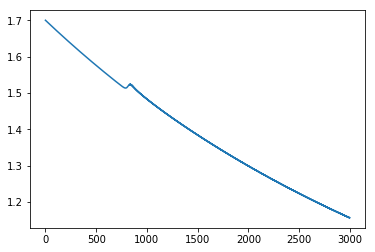

In [43]:
new,L=trainer(3000,w=new);plt.plot(L);plt.show()

In [44]:
tester(test_x,one_test,test_y,new)

('Test Loss: ', 1.1411206974245787)
((5128, 16), (5128, 16))
(array([10, 10, 13, ..., 10, 10, 10]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15]))
[ 2 12 14 ...  3 10 11]
0.6858619344773791


1.1411206974245787